In [1]:
import logging
import numpy as np
import pandas as pd
root = logging.getLogger()
root.addHandler(logging.StreamHandler())
%matplotlib inline

In [2]:
import pandas as pd
from iSDM.species import GBIFSpecies
import rasterio
from rasterio.transform import Affine

In [3]:
# download from Google Drive: https://drive.google.com/open?id=0B9cazFzBtPuCOFNiUHYwcVFVODQ
# Representative example with multiple polygons in the shapefile, and a lot of point-records (also outside rangemaps)
from iSDM.species import IUCNSpecies
salmo_trutta = IUCNSpecies(name_species='Salmo trutta')
salmo_trutta.load_shapefile("../data/fish/selection/salmo_trutta")

Enabled Shapely speedups for performance.
Loading data from: ../data/fish/selection/salmo_trutta
The shapefile contains data on 3 species areas.


In [4]:
salmo_trutta.data_full.crs

{'init': 'epsg:4326'}

In [5]:
rasterized = salmo_trutta.rasterize(raster_file="./salmo_trutta_full.tif", pixel_size=0.5, all_touched=True)

RASTERIO: Data rasterized into file ./salmo_trutta_full.tif 
RASTERIO: Resolution: x_res=720 y_res=360


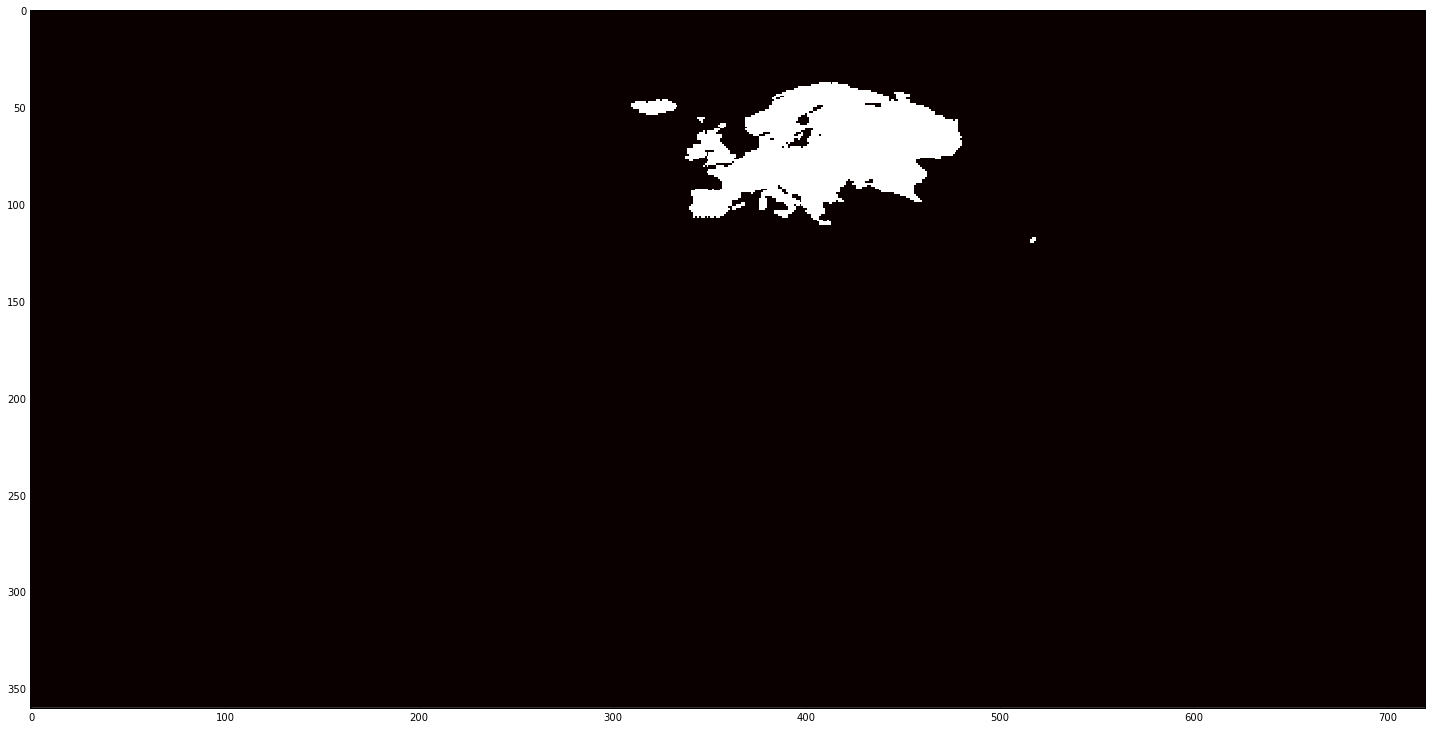

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,20))
plt.imshow(rasterized, cmap="hot", interpolation="none")

In [7]:
coordinates = salmo_trutta.pixel_to_world_coordinates()

No raster data provided, attempting to load default...
Loaded raster data from ./salmo_trutta_full.tif 
Driver name: GTiff 
Resolution: x_res=720 y_res=360.
Coordinate reference system: {'init': 'epsg:4326'} 
Affine transformation: (-180.0, 0.5, 0.0, 90.0, 0.0, -0.5) 
Number of layers: 1 
Succesfully loaded existing raster data from ./salmo_trutta_full.tif.
Affine transformation T0:
 |-0.50, 0.00, 90.00|
| 0.00, 0.50,-180.00|
| 0.00, 0.00, 1.00| 
Raster data shape: (360, 720) 
Affine transformation T1:
 |-0.50, 0.00, 89.75|
| 0.00, 0.50,-179.75|
| 0.00, 0.00, 1.00| 
Filtering out no_data pixels.


In [8]:
my_data = pd.DataFrame([coordinates[0], coordinates[1]]).T 

In [9]:
my_data.columns = ['decimallatitude', 'decimallongitude']

In [10]:
from iSDM.species import GBIFSpecies
my_species = GBIFSpecies(name_species="SomeSpecies")
my_species.set_data(my_data)

Enabled Shapely speedups for performance.


Data geometrized: converted into GeoPandas dataframe.
Points with NaN coordinates ignored. 


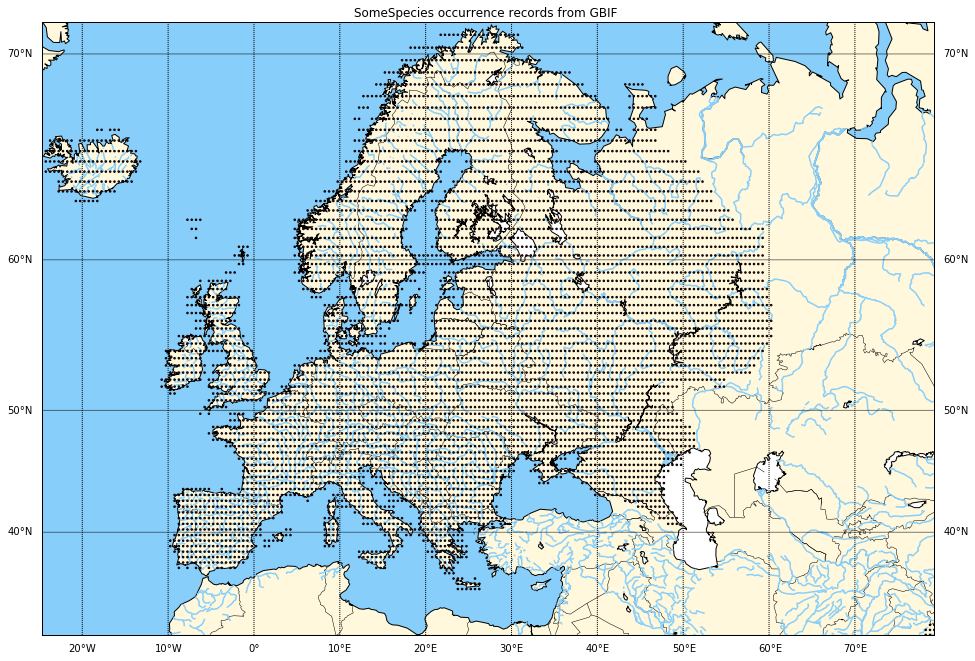

In [11]:
my_species.plot_species_occurrence()

In [12]:
my_species.data_full = my_species.data_full.geometry
from iSDM.species import IUCNSpecies
geom_species = IUCNSpecies(name_species="GOD DAMN")
geom_species.set_data(my_species.get_data())
geom_species.save_shapefile("./here_be_dragons_full")

Enabled Shapely speedups for performance.
Saved data: ./here_be_dragons_full 


In [13]:
geom_species.data_full.shape

(6089,)

In [14]:
coordinates[0].shape

(6089,)

In [15]:
from iSDM.environment import RasterEnvironmentalLayer

In [16]:
biomes_adf = RasterEnvironmentalLayer(file_path="/home/daniela/git/iSDM/data/rebioms/w001001.adf")

In [17]:
raster_biomes_reader = biomes_adf.load_data()

Loading data from /home/daniela/git/iSDM/data/rebioms/w001001.adf 
Metadata: {'affine': Affine(0.5, 0.0, -180.0,
       0.0, -0.5, 90.0),
 'count': 1,
 'crs': {'init': 'epsg:4326'},
 'driver': 'AIG',
 'dtype': 'uint8',
 'height': 360,
 'nodata': 255.0,
 'transform': (-180.0, 0.5, 0.0, 90.0, 0.0, -0.5),
 'width': 720} 
Resolution: (0.5, 0.5) 
Bounds: BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0) 
Dataset loaded. Use .read() or .read_masks() to access the layers.


In [18]:
raster_data_biomes = raster_biomes_reader.read(1)

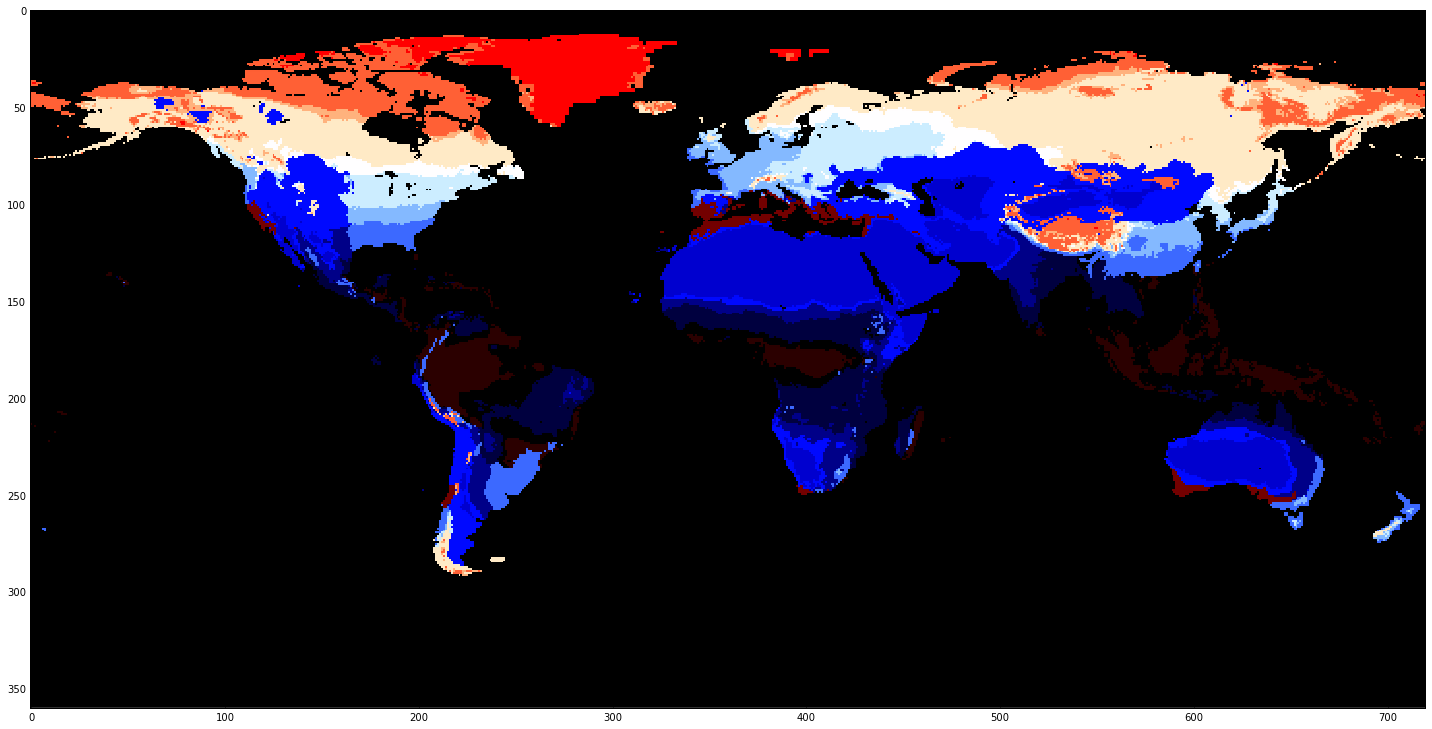

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,20))
plt.imshow(raster_data_biomes, cmap="flag", interpolation="none")

In [20]:
raster_data_biomes.shape

(360, 720)

In [22]:
np.unique(raster_data_biomes[raster_data_biomes!=raster_biomes_reader.nodata]) # what are the unique values here, ignoring nodata=255

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21], dtype=uint8)

In [23]:
T0 = raster_biomes_reader.affine
T1 = Affine(*reversed(T0.to_gdal()))
T2 = T1 * Affine.translation(0.5, 0.5)

In [26]:
coordinates_some_biome = T2 * np.where(raster_data_biomes == 13 ) # 13 has overlap with this fish

In [27]:
coordinates_some_biome

(array([ 58.25,  58.25,  58.25, ..., -46.25, -46.75, -46.75]),
 array([  -6.25,   -5.25,   11.75, ...,  170.25,  167.75,  169.25]))

In [28]:
coordinates

(array([ 71.25,  71.25,  71.25, ...,  30.75,  30.25,  30.25]),
 array([ 23.75,  24.25,  24.75, ...,  79.25,  78.25,  78.75]))

Enabled Shapely speedups for performance.
Data geometrized: converted into GeoPandas dataframe.
Points with NaN coordinates ignored. 


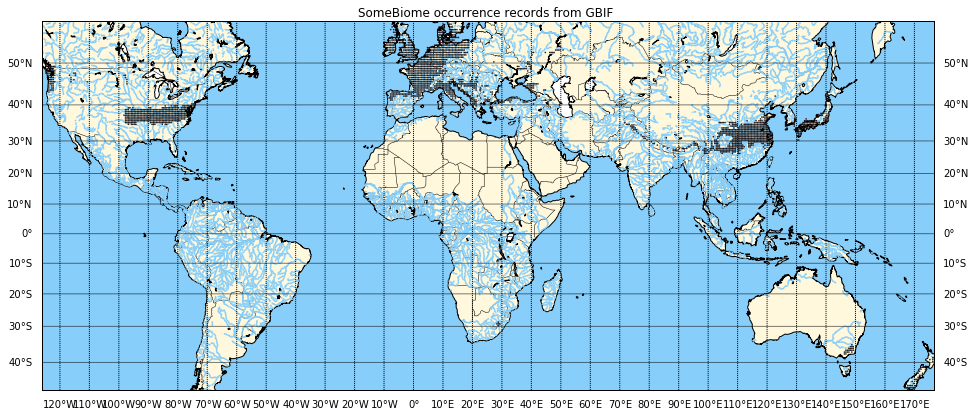

In [29]:
from iSDM.species import GBIFSpecies
my_species = GBIFSpecies(name_species="SomeBiome")
my_data = pd.DataFrame([coordinates_some_biome[0], coordinates_some_biome[1]]).T 
my_data.columns = ['decimallatitude', 'decimallongitude']
my_species.set_data(my_data)
my_species.plot_species_occurrence()

In [30]:
set(coordinates_some_biome[0]).intersection(set(coordinates[0]))

{30.25,
 30.75,
 31.25,
 34.75,
 35.25,
 35.75,
 36.25,
 36.75,
 37.25,
 37.75,
 38.25,
 38.75,
 39.25,
 39.75,
 40.25,
 40.75,
 41.25,
 41.75,
 42.25,
 42.75,
 43.25,
 43.75,
 44.25,
 44.75,
 45.25,
 45.75,
 46.25,
 46.75,
 47.25,
 47.75,
 48.25,
 48.75,
 49.25,
 49.75,
 50.25,
 50.75,
 51.25,
 51.75,
 52.25,
 52.75,
 53.25,
 53.75,
 54.25,
 54.75,
 55.25,
 55.75,
 56.25,
 56.75,
 57.25,
 57.75,
 58.25}

In [31]:
len(set(coordinates_some_biome[1]).intersection(set(coordinates[1])))

120

In [33]:
np.where(raster_data_biomes == 13 )

(array([ 63,  63,  63, ..., 272, 273, 273]),
 array([347, 349, 383, ..., 700, 695, 698]))

In [34]:
np.where(rasterized>0)

(array([ 37,  37,  37, ..., 118, 119, 119]),
 array([407, 408, 409, ..., 518, 516, 517]))

In [35]:
len(set(np.where(raster_data_biomes==13)[0]).intersection(set(np.where(rasterized>0)[0])))

51

In [36]:
len(set(coordinates_some_biome[0]).intersection(set(coordinates[0])))

51

In [37]:
len(set(np.where(raster_data_biomes==13)[1]).intersection(set(np.where(rasterized>0)[1])))

120

In [38]:
len(set(coordinates_some_biome[1]).intersection(set(coordinates[1])))

120

In [39]:
set(np.where(raster_data_biomes==13)[0]).intersection(set(np.where(rasterized>0)[0]))

{63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 117,
 118,
 119}

In [40]:
set(coordinates_some_biome[0]).intersection(set(coordinates[0]))

{30.25,
 30.75,
 31.25,
 34.75,
 35.25,
 35.75,
 36.25,
 36.75,
 37.25,
 37.75,
 38.25,
 38.75,
 39.25,
 39.75,
 40.25,
 40.75,
 41.25,
 41.75,
 42.25,
 42.75,
 43.25,
 43.75,
 44.25,
 44.75,
 45.25,
 45.75,
 46.25,
 46.75,
 47.25,
 47.75,
 48.25,
 48.75,
 49.25,
 49.75,
 50.25,
 50.75,
 51.25,
 51.75,
 52.25,
 52.75,
 53.25,
 53.75,
 54.25,
 54.75,
 55.25,
 55.75,
 56.25,
 56.75,
 57.25,
 57.75,
 58.25}

In [42]:
raster_data_biomes

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ..., 
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [43]:
rasterized

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [63]:
raster_data_biomes[raster_data_biomes==255] = 0

In [64]:
selected_biomes = raster_data_biomes * rasterized # as easy as that, to get all overlapping pixels

In [65]:
selected_biomes.shape

(360, 720)

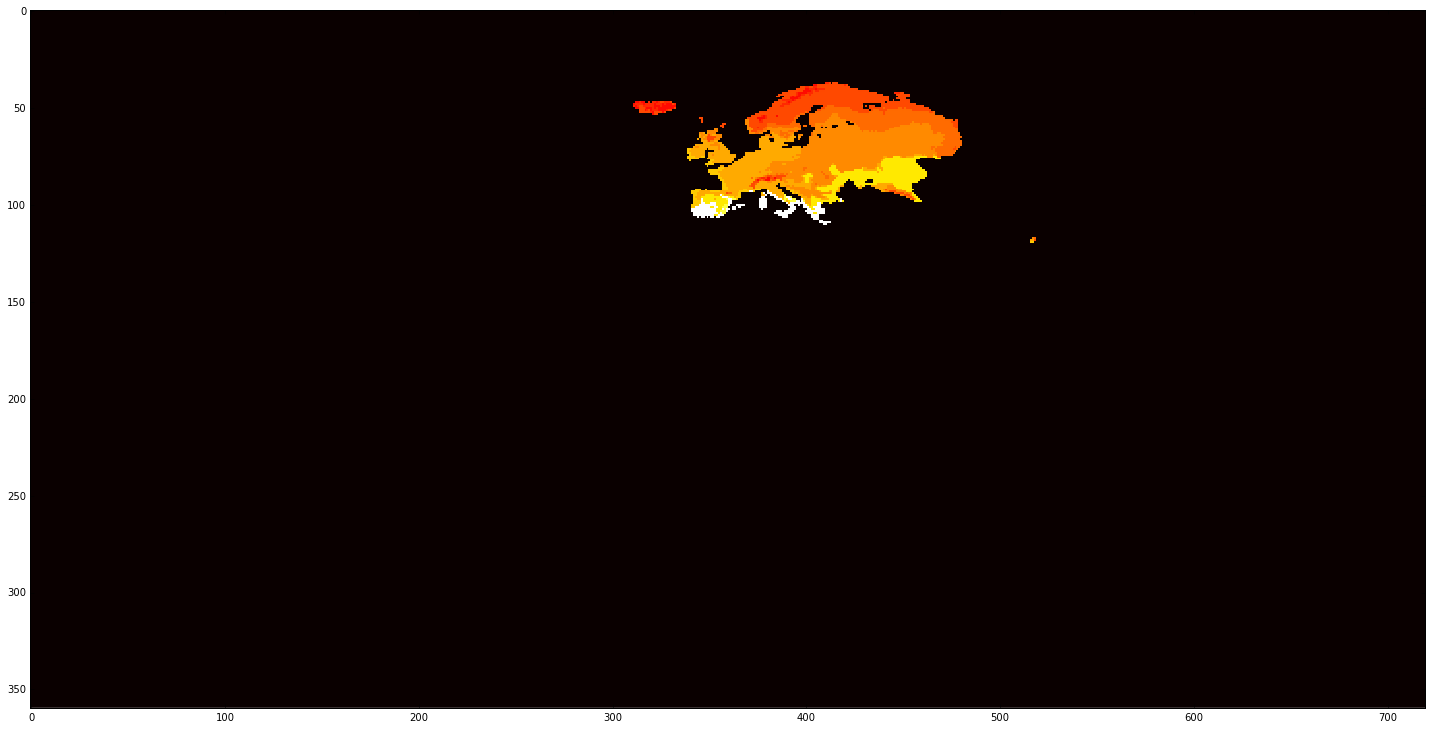

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,20))
plt.imshow(selected_biomes, cmap="hot", interpolation="none") # pure awesomeness

In [67]:
np.unique(selected_biomes) # these are all the regions that need to be taken into account

array([ 0,  8,  9, 10, 11, 12, 13, 14, 15, 17, 21], dtype=uint8)

In [68]:
# conclusion: world coordinates not even needed at this stage
unique_biomes = np.unique(selected_biomes) # these are all the regions that need to be taken into account
unique_biomes = unique_biomes[1:] # remove the 0

In [69]:
layers = []
for biome in unique_biomes:
    layers.append(np.where(raster_data_biomes==biome ))

In [70]:
layers[2] # coordinates

(array([ 28,  29,  30, ..., 290, 290, 291]),
 array([587, 586, 578, ..., 226, 227, 221]))

In [71]:
raster_data_biomes[layers[2]] # values

array([10, 10, 10, ..., 10, 10, 10], dtype=uint8)

In [72]:
raster_data_biomes[layers[3]] # cool

array([11, 11, 11, ..., 11, 11, 11], dtype=uint8)

In [73]:
empty_raster = np.zeros_like(raster_data_biomes)

In [74]:
# pick out only those layers that have been selected
for layer in layers:
    empty_raster[layer] = raster_data_biomes[layer]

In [75]:
np.unique(empty_raster) # COOL!

array([ 0,  8,  9, 10, 11, 12, 13, 14, 15, 17, 21], dtype=uint8)

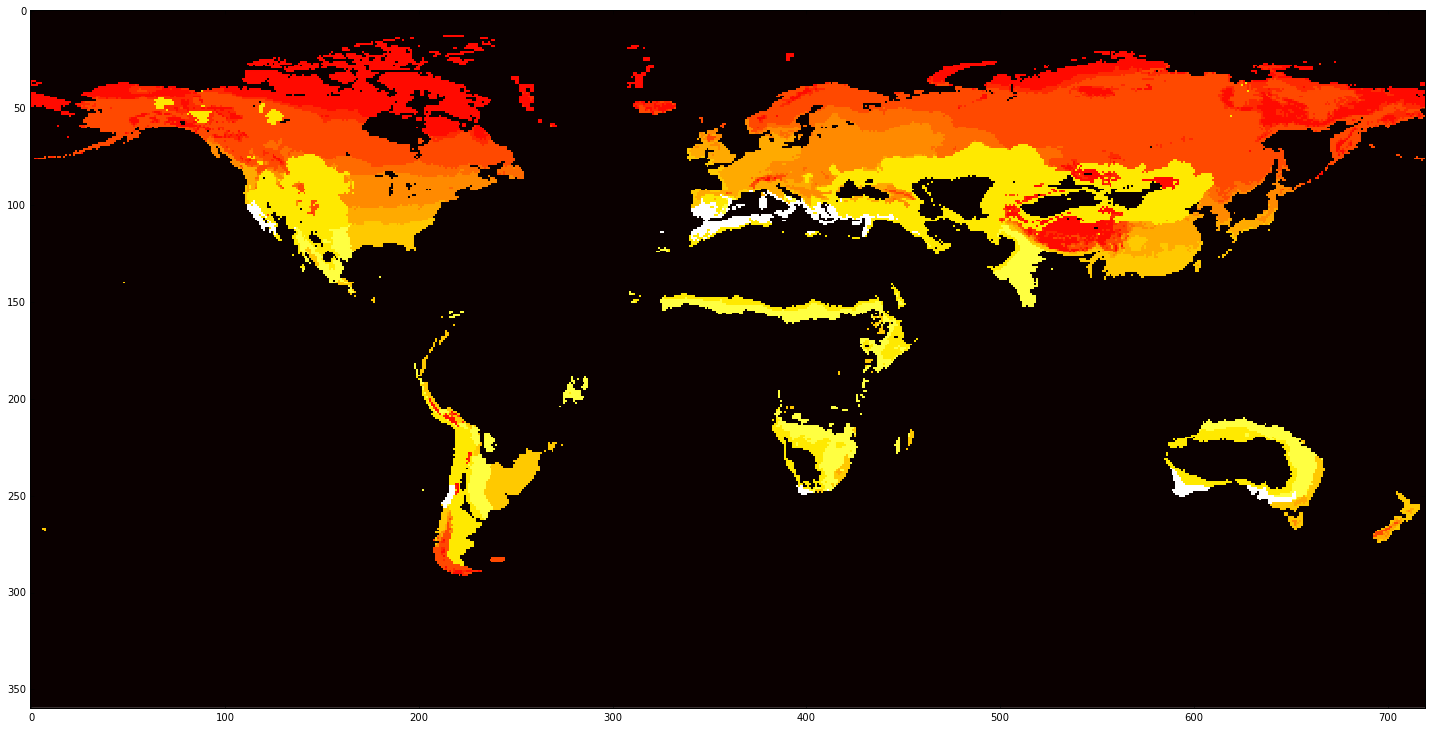

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,20))
plt.imshow(empty_raster, cmap="hot", interpolation="none") # pure awesomeness

In [77]:
np.where(selected_biomes>0) # these pixels need to go

(array([ 37,  37,  37, ..., 118, 119, 119]),
 array([410, 411, 412, ..., 518, 516, 517]))

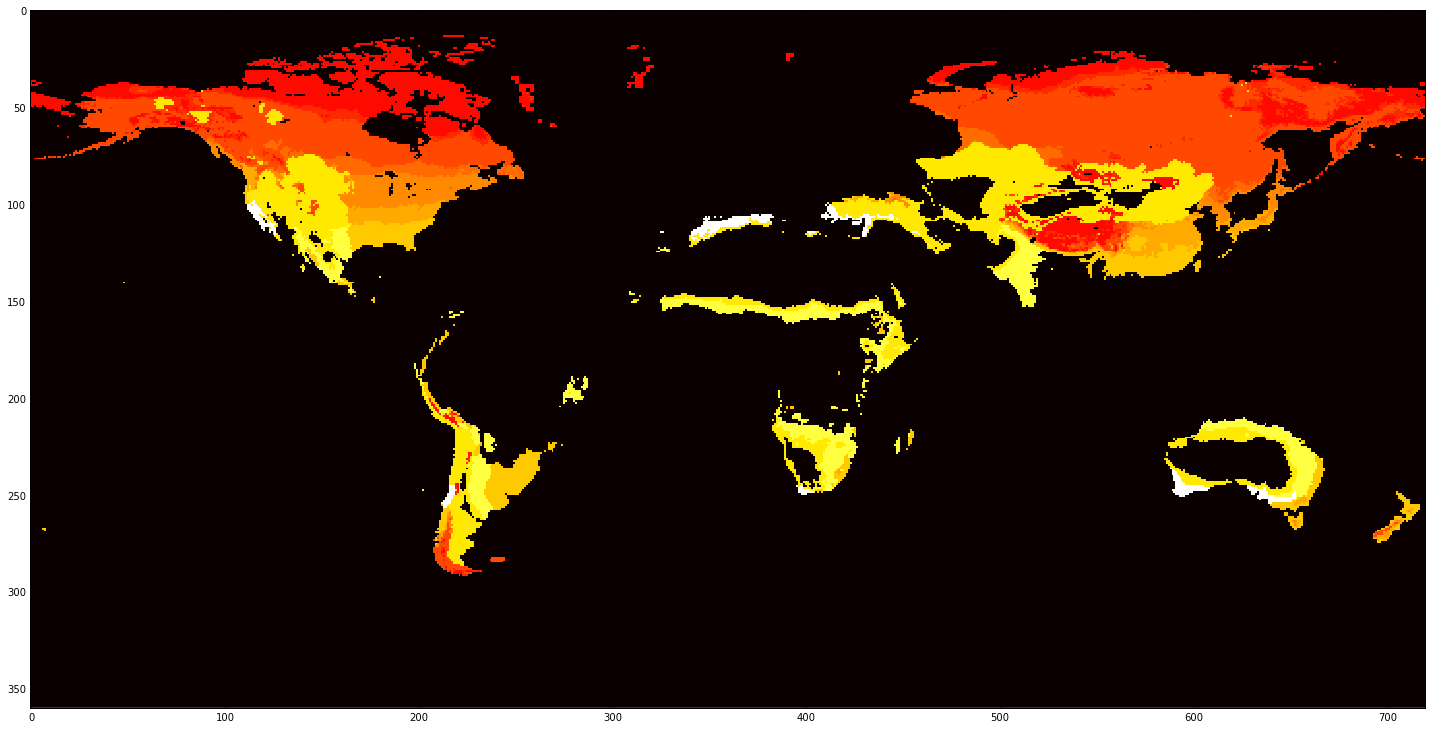

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,20))
plt.imshow(empty_raster-selected_biomes, cmap="hot", interpolation="none") # this is where we sample pseudo-absences from!!